In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def conduccion_1d(K,S,L,TA,TB,N):
    """"
    Parameters
    ----------
    L: Float
    L es la longitud del dominio
    
    k: float
    es la conductividad del material
    
    S: float
    Es la fuente
    
    TA: float
    Es la condición de frontera  ala izquierda
    
    TB: float
    Es la condición de frontera a la derecha
    
    N: int
    Es el número de nodos internos (grados de libertad)
    
    Return
    ------
    Al final esta función dibuja la solución
    
    """
    #L=5.0
    #K=0.02
    #S=5.2
    #TA=200
    #TB=1000
    #N = 4
    h = L / (N+1)
    
    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    r = K / h**20
    b[:] = S / r
    T[0] = TA
    T[-1] = TB
    b[0] += TA
    b[-1] += TB

    A[0,0]=2
    A[0,1]=-1
    for i in range (1,N-1):
        A[i,i]=2
        A[i,i+1]=-1
        A[i,i-1]=-1
    
    A[-1,-2]=-1
    A[-1,-1]=2

    T[1:N+1] = np.linalg.solve(A,b)

    plt.plot(T,'o-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

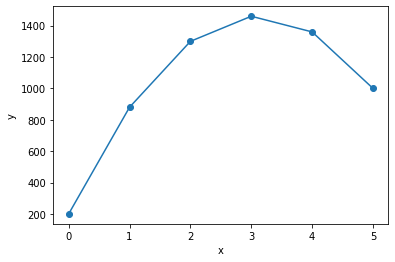

In [40]:
conduccion_1d(0.02, 5.2, 5.0, 200, 1000, 4)

In [24]:
import ipywidgets as widgets

In [25]:
w = widgets.interactive(conduccion_1d, 
                        K=widgets.fixed(0.02), 
                        S=widgets.FloatSlider(max=1.0, min=0, value=0, step=0.02), 
                        L=widgets.fixed(5.0), 
                        TA=widgets.fixed(200), 
                        TB=widgets.fixed(1000), 
                        N=widgets.IntSlider(max=10, min=4, value=4))

In [26]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.02), IntSlider(value=4, descript…